In [12]:
import intake
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import intake_esm
#url = intake_esm.tutorial.get_url('google_cmip6')
#p
url ="https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"

import dask

dask.config.set(scheduler='threads')
dask.config.set(num_workers=20)  # Adjust based on your CPU coresl ="https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"

In [14]:
testds = xr.open_dataset('http://noresg.nird.sigma2.no/thredds/dodsC/esg_dataroot/cmor/CMIP6/OMIP/NCC/NorESM2-LM/omip1/r1i1p1f1/Omon/ph/gr/v20190920/ph_Omon_NorESM2-LM_omip1_r1i1p1f1_gr_170001-170912.nc')
testds

<xarray.Dataset>
Dimensions:             (time: 120, bnds: 2, lev: 70, j: 385, i: 360,
                         vertices: 4)
Coordinates:
  * time                (time) object 1700-01-16 12:00:00 ... 1709-12-16 12:0...
  * lev                 (lev) float64 0.0 5.0 10.0 ... 6.25e+03 6.5e+03 6.75e+03
  * j                   (j) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384 385
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 ...
    longitude           (j, i) float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object ...
    lev_bnds            (lev, bnds) float64 ...
    vertices_latitude   (j, i, vertices) float64 ...
    vertices_longitude  (j, i, vertices) float64 ...
    ph                  (time, lev, j, i) float32 ...
Attributes: (12/50)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     OMIP
    branch_method:                   no parent
    branch_time:                     0.0
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    ...                              ...
    variable_id:                     ph
    variant_label:                   r1i1p1f1
    license:                         CMIP6 model data produced by NCC is lice...
    cmor_version:                    3.5.0
    tracking_id:                     hdl:21.14100/c74b9b82-ccb8-4866-b986-993...
    DODS_EXTRA.Unlimited_Dimension:  time

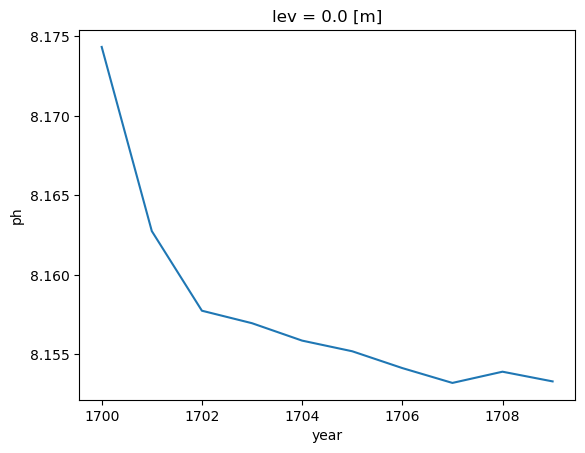

In [16]:
testds.ph.isel(lev = 0).mean(dim=['j','i']).groupby('time.year').mean().plot()